In [1]:
# IMPORTS
import matplotlib.pyplot as plt
import re
import subprocess

In [7]:
# SETTINGS
host = "google.de"
amount = 50
timeout_value = 1000

# RESULT ARRAY
result = []

In [8]:
# RUNNING THE CMD AND SPLITTING STR TO LIST
cli = subprocess.check_output(
    f"ping -n {amount} {host}",
    errors="ignore"
).split("\n")

In [9]:
# GETTING MIN, AVG, MAX FROM THE SECOND TO LAST LINE
lastrow = cli[len(cli) - 2]

min_value = re.search('Minimum = (.*?)ms,', lastrow).group(1)
max_value = re.search('Maximum = (.*?)ms', lastrow).group(1)
avg_value = re.search('Mittelwert = (.*?)ms', lastrow).group(1)

In [10]:
# ITERATE OVER THE ARRAY AND APPEND VALUES DEPENDING ON CONDITION

for row in cli:
    ms = re.search('Zeit=(.*)ms', row)        # normal Ping display
    sub = re.search('Zeit<(.*)ms', row)       # Ping <1 ms
    
    if ms:
        result.append(int(ms.group(1))) 
    
    if sub:
        result.append(1)
        
    if "Anforderung" in row:                  # Timeouts are display with this in german
        result.append(timeout_value)
        max_value = timeout_value

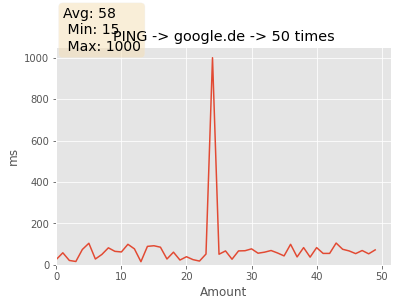

In [11]:
# MATPLOTLIB 
plt.plot(result)
plt.style.use("ggplot")

plt.title(f"PING -> {host} -> {amount} times")
text = f"Avg: {avg_value} \n Min: {min_value} \n Max: {max_value}"
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(1,  int(max_value) + 35, text, bbox=props, fontsize=14)

plt.xlim(0)
plt.xlabel("Amount")

plt.ylim(0, int(max_value) + 50)
plt.ylabel("ms")

plt.show()